In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from vnstock import *
from PIL import Image
import os
dictE_V = {
    'quarter': 'Quý',
    'year': 'Năm',
    'priceToEarning': 'P/E',
    'priceToBook': 'P/B',
    'roe': 'ROE',
    'roa': 'ROA',
    'earningPerShare': 'EPS',
    'bookValuePerShare': 'BVPS',
    'valueBeforeEbitda': 'EV/EBITDA',
    'grossProfitMargin': 'Biên LN gộp',
    'debtOnEquity': 'Vay/VCSH'
}
list_of_keys = list(dictE_V.keys())

In [6]:
symbol = input("Stock: ")
start_year = int(input("Start year: "))
end_year = int(input("End year: "))
year_list = list(range(start_year, end_year + 1))

In [ ]:
df = financial_ratio(symbol, 'quarterly', True)
df = df.iloc[::-1, :]
df = df.filter(items=list_of_keys)
df = df.loc[df['year'].isin(year_list)]
df = df.rename(columns=lambda x: dictE_V[x])
df = df.reset_index(drop=True)

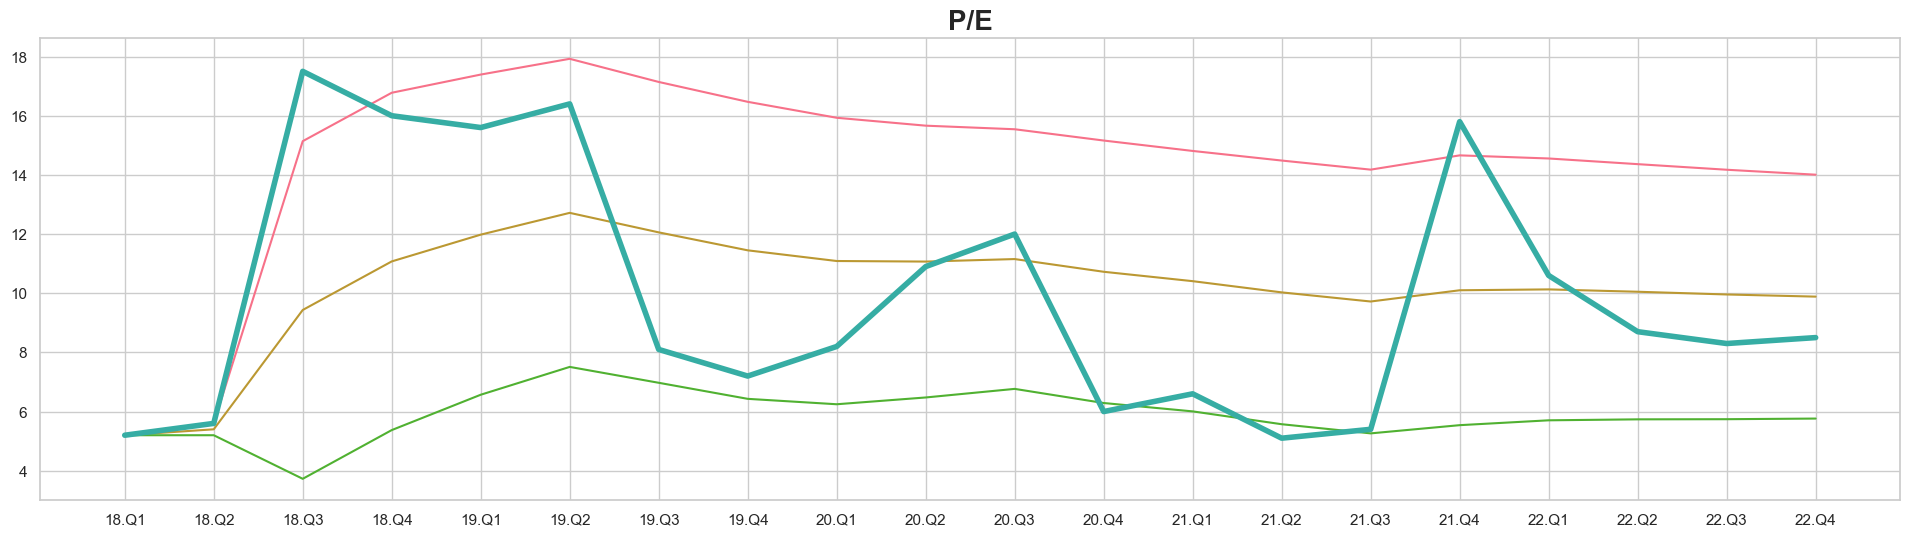

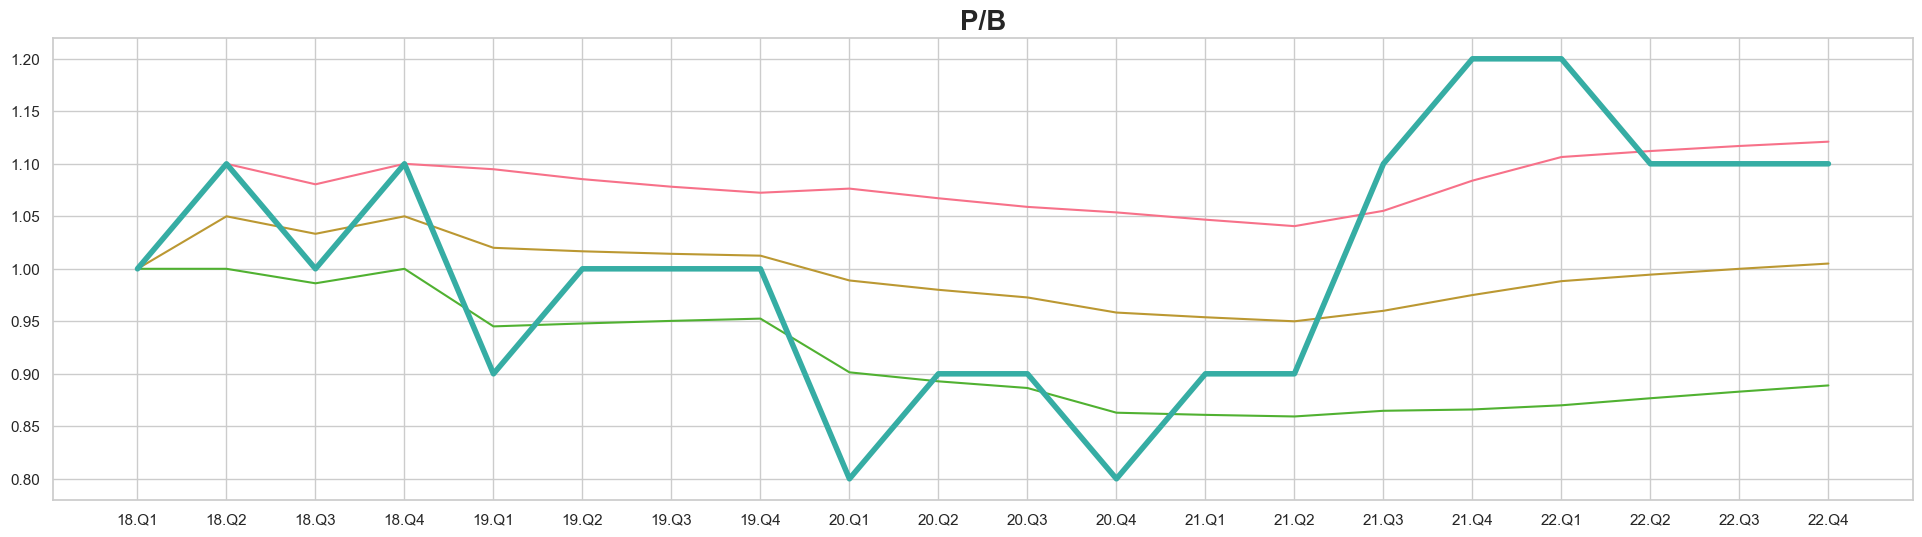

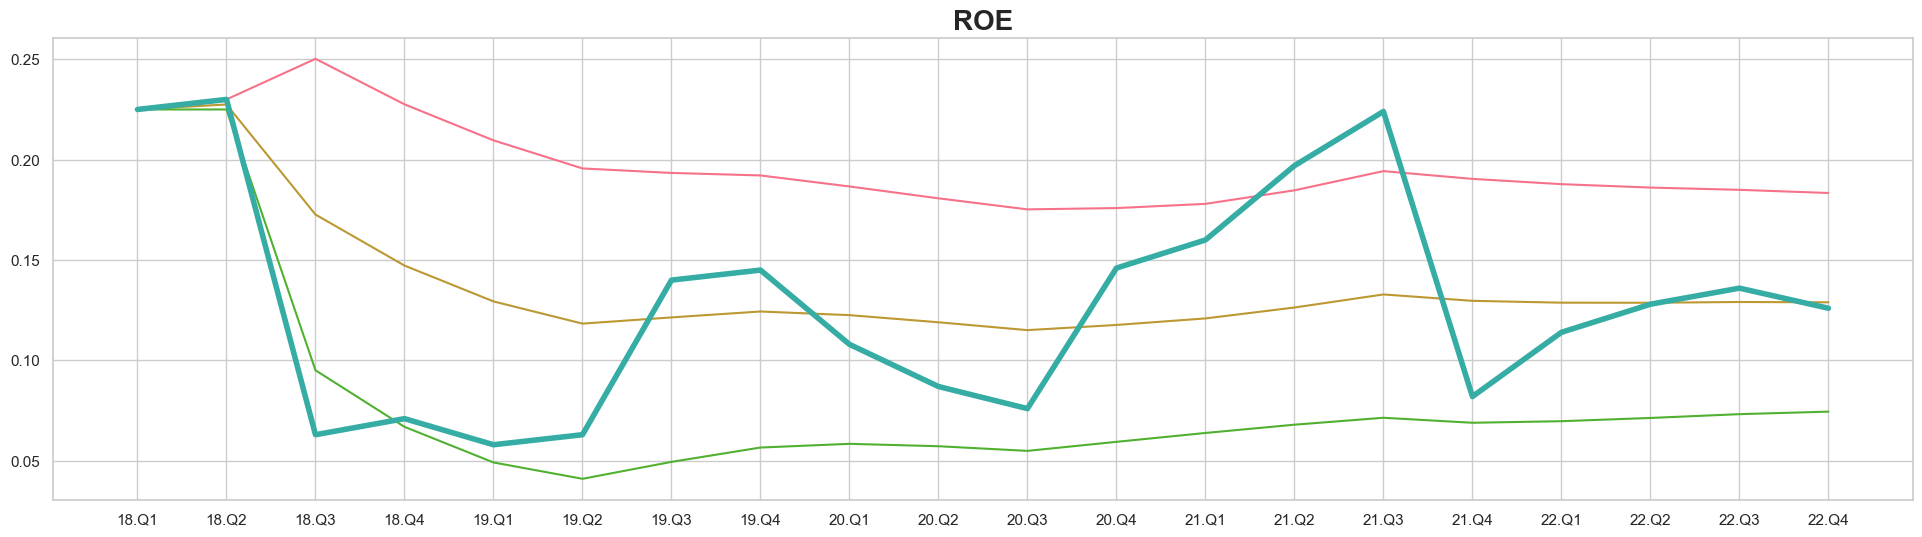

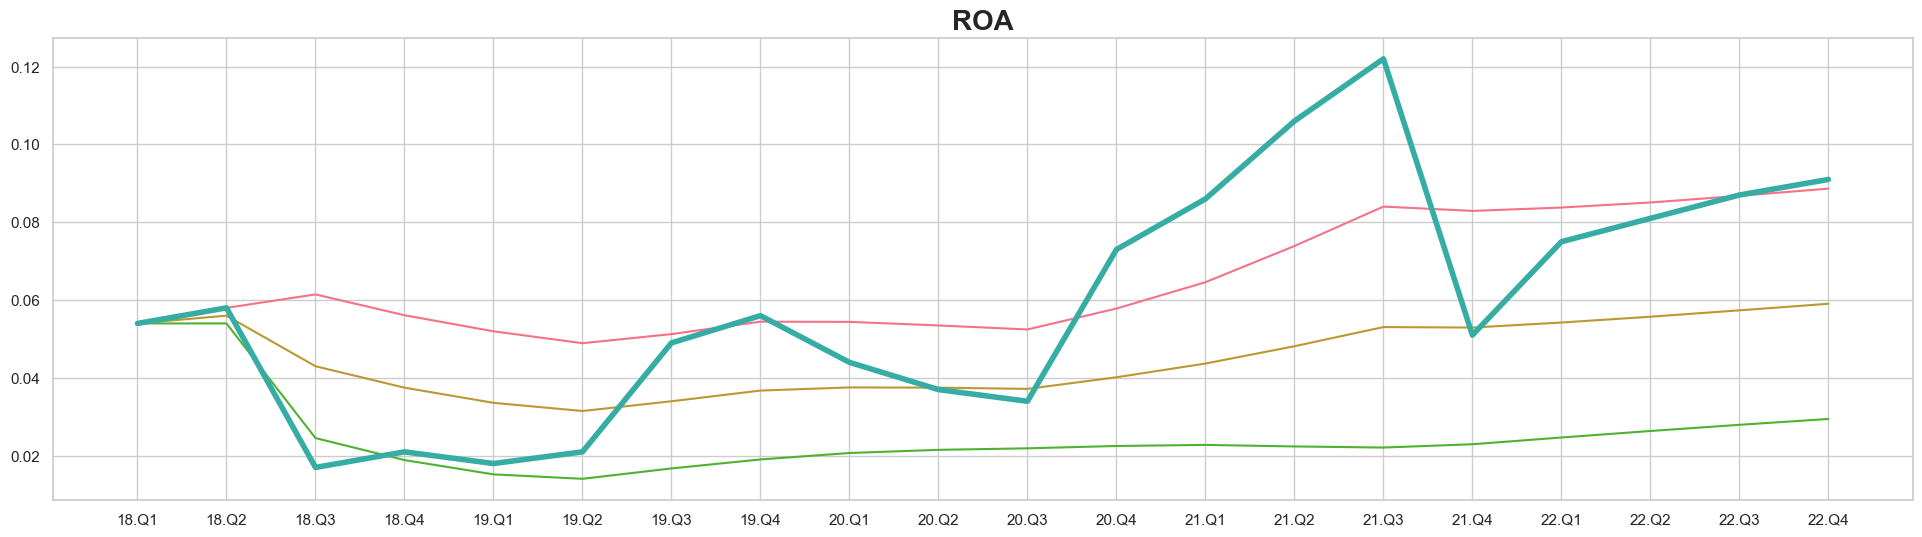

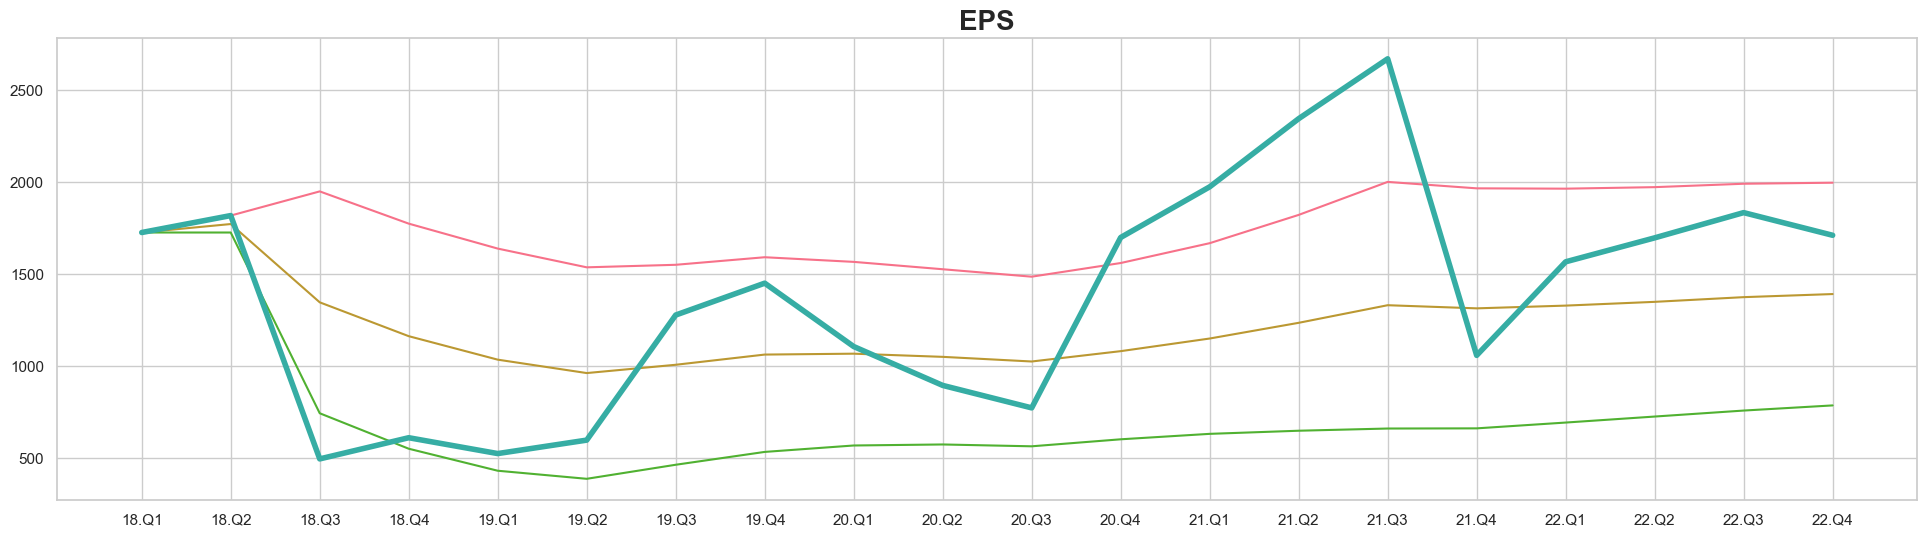

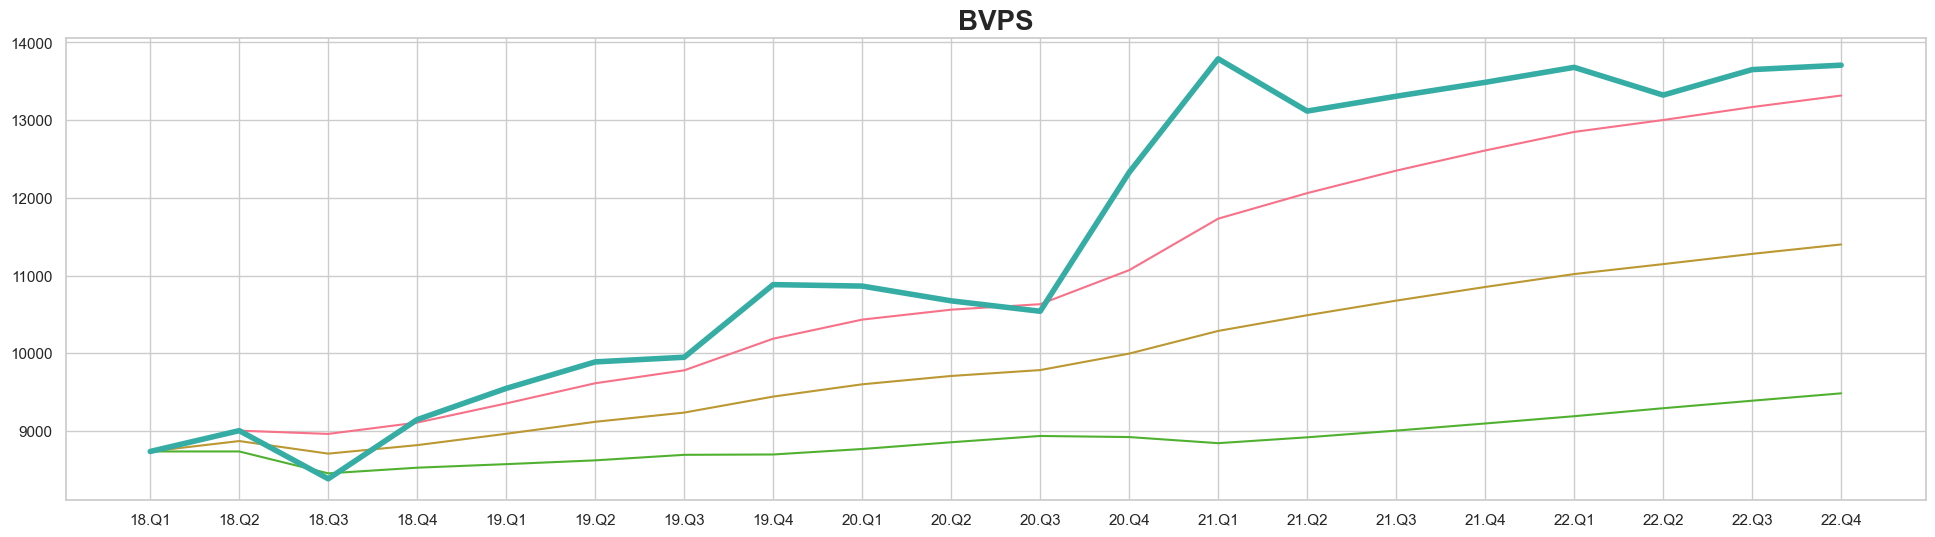

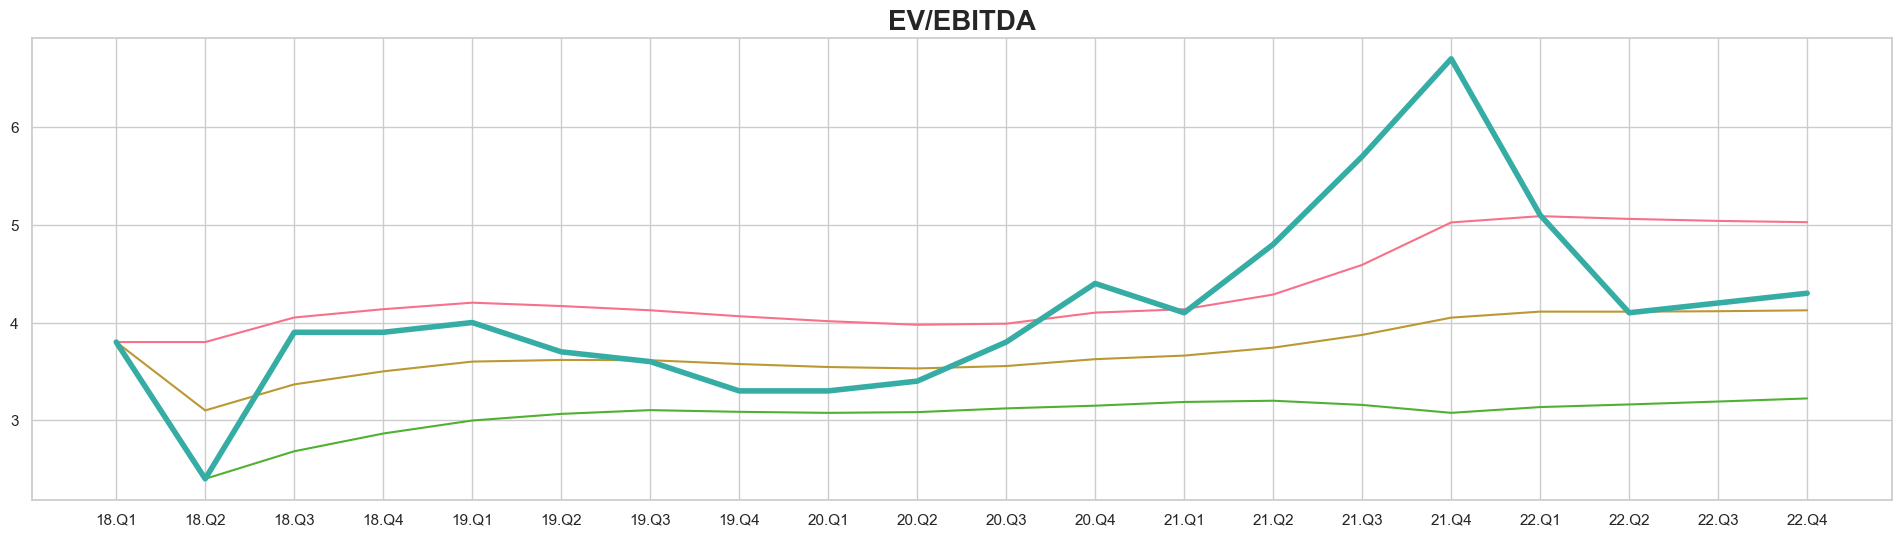

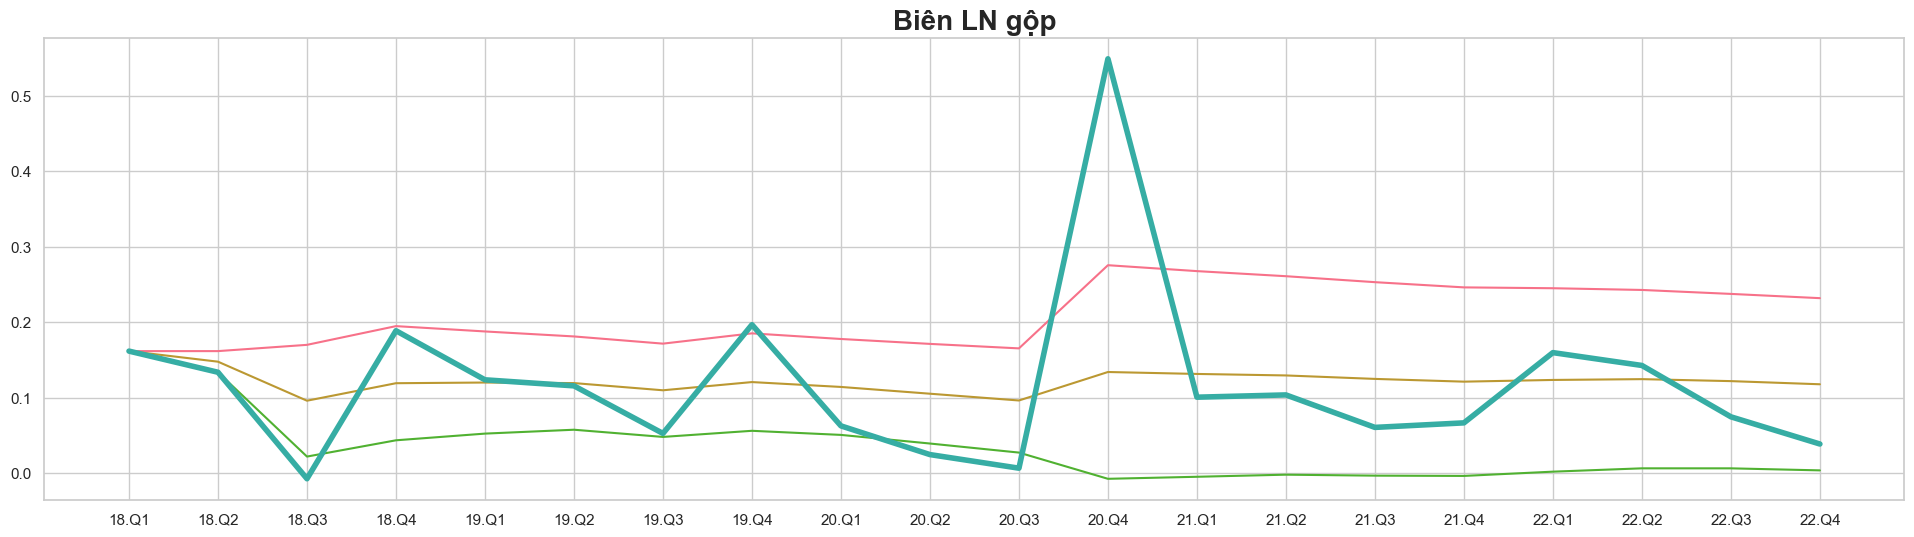

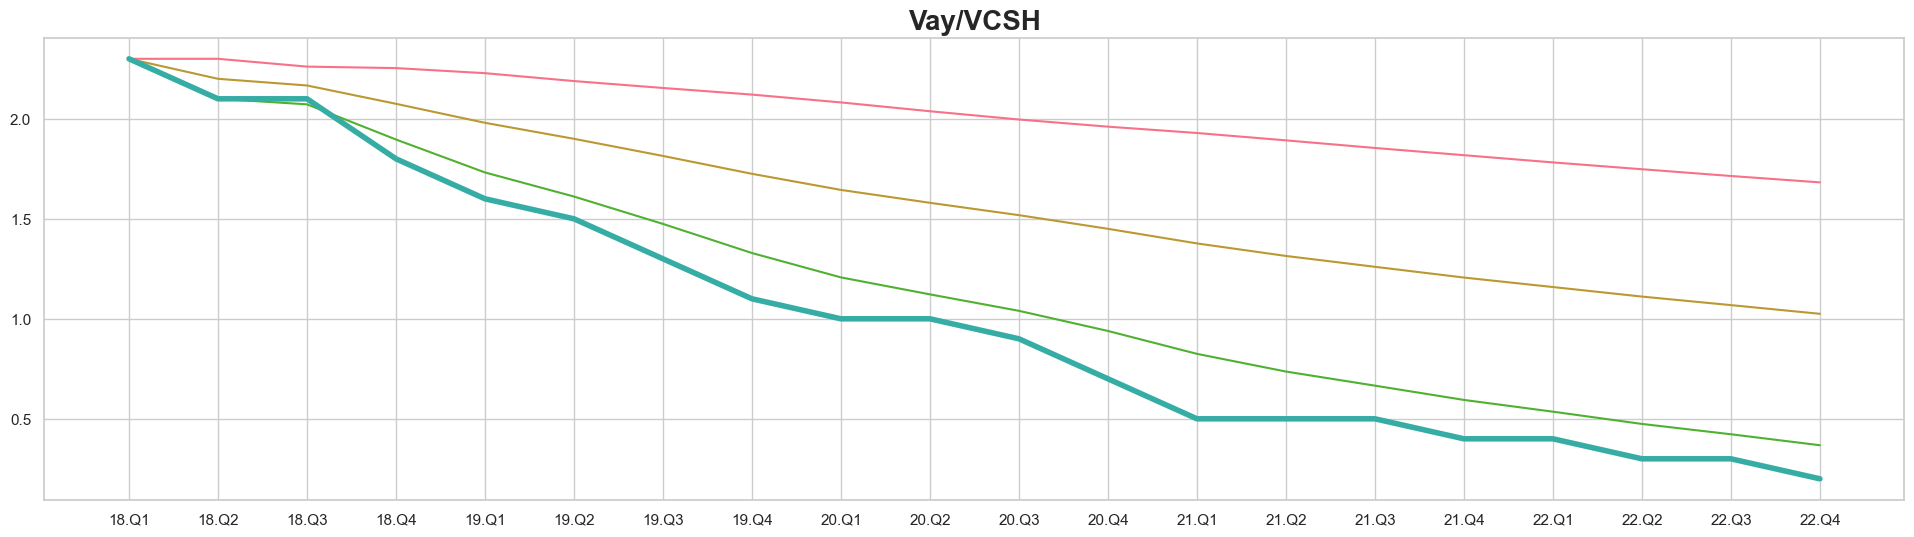

In [4]:
i = 1
for col in df.columns[2:]:
    array = []
    date = []
    mean_arr = []
    high_arr = []
    low_arr = []
    for index, row in enumerate(df[col]):
        if(not math.isnan(row)):
            date.append(str(int(df.iloc[index]['Năm']-2000)) + '.Q' + str(int(df.iloc[index]['Quý'])))
            array.append(row)
            mean_arr.append(np.mean(array))
            std = np.std(array)
            high_arr.append(mean_arr[-1] + std)
            low_arr.append(mean_arr[-1] - std)
    t_df = pd.DataFrame({
        'date': date,
        'data': array
    })
    sns.set_theme(style='whitegrid', palette='husl')
    plt.figure(figsize=(24,6))
    plt.plot(high_arr)
    plt.plot(mean_arr)
    plt.plot(low_arr)
    plt.title(col, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    plt.plot('date', 'data', data=t_df, linestyle='-', linewidth=4)
    plt.savefig('Output/' + str(i), dpi=400)
    i = i + 1
    
i1 = Image.open("./Output/1.png")
i2 = Image.open("./Output/2.png")
i3 = Image.open("./Output/3.png")
i4 = Image.open("./Output/4.png")
i5 = Image.open("./Output/5.png")
i6 = Image.open("./Output/6.png")
i7 = Image.open("./Output/7.png")
i8 = Image.open("./Output/8.png")
i9 = Image.open("./Output/9.png")
financial_ratio = Image.new("RGB", (i1.width, i1.height+i2.height+i3.height+i4.height+i5.height+i6.height+i7.height+i8.height+i9.height))
financial_ratio.paste(i1, (0, 0))
financial_ratio.paste(i2, (0, i1.height))
financial_ratio.paste(i3, (0, i1.height + i2.height))
financial_ratio.paste(i4, (0, i1.height + i2.height + i3.height))
financial_ratio.paste(i5, (0, i1.height + i2.height + i3.height + i4.height))
financial_ratio.paste(i6, (0, i1.height + i2.height + i3.height + i4.height + i5.height))
financial_ratio.paste(i7, (0, i1.height + i2.height + i3.height + i4.height + i5.height + i6.height))
financial_ratio.paste(i8, (0, i1.height + i2.height + i3.height + i4.height + i5.height + i6.height + i7.height))
financial_ratio.paste(i9, (0, i1.height + i2.height + i3.height + i4.height + i5.height + i6.height + i7.height + i8.height))
financial_ratio.save("./Output/Financial_Ratio.jpg")
os.remove("./Output/1.png")
os.remove("./Output/2.png")
os.remove("./Output/3.png")
os.remove("./Output/4.png")
os.remove("./Output/5.png")
os.remove("./Output/6.png")
os.remove("./Output/7.png")
os.remove("./Output/8.png")
os.remove("./Output/9.png")